<i>STATUS: Draft<i>


<div>These are general calculus notes with some related python code</div><br/>


<i>Tags: Sketching surfaces, vector functions, equations of lines, equations of planes, quadric surfaces</i>

<hr/>

In [11]:
import numpy as np
import sympy as sp
from IPython.display import HTML
import ipywidgets as widgets
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd
import itertools

# This is commented out
#%matplotlib widget

In [12]:
x, y = sp.symbols('x y')
sp.solveset(sp.Eq(x**2 + y **2, 4), x, domain = S.Reals)

def graph3DPoints():
    pass
# 1. graph rational points
# 2. graph irrational points
# 3. Graph complex points


NameError: name 'S' is not defined

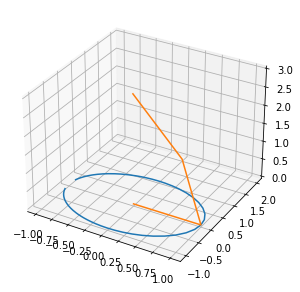

In [13]:
def computeParameterisedPointFromCircle(initialValues, radius):
    x = (radius * (1 - initialValues**2) / (1 + initialValues**2))
    y = ((2 * radius * initialValues) / (1 + initialValues**2))
    return([x, y])



xValues, yValues =  computeParameterisedPointFromCircle(np.arange(start=-10, stop=10, step=.1), 1)
zValues = np.zeros(len(xValues))


fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(projection='3d')


x = np.array([0, 1, 0, 0])
y = np.array([0, 0, 2, 0])
z = np.array([0, 0, 0, 3])

p = ax1.plot(xValues, yValues, zValues, label = "")
p = ax1.plot(x, y, z, label = "")



#### Problems 1-2

In [18]:
#1-2.1
# Let P1 and P2 be points
p1 = np.array([2, -4, 1])
p2 = np.array([0, 4, -10])

# Let s1 be a vector created from points P1 and P2
s1 = p2 - p1

# Let v2 be a vector form of line created from P1 and V1
t = sp.symbols('t')
s2 = p1 + t * s1
s2

# Let 
[[expr.subs({t:val}) for expr in s2] for val in [0, 1,2,3]]  

[[2, -4, 1], [0, 4, -10], [-2, 12, -21], [-4, 20, -32]]

In [19]:
#1-2.2
# Let p1 be a point
p1 = np.array([-7, 2, 4])

# Let v1 be a line in vector
u, t = sp.symbols('u t')
v1 = np.array([5 * u - 8 * t, 6 * u + t, -12 * t])

# Let v2 be a normal vector
v2 = np.array([expr.subs({t:1, u: 0}) for expr in v1])   

# Let s2 be a line in vector form 
s2 = p1  +  t * v2 
print(s2)
# Note can be converted to parametric form or symmetric form 



[-8*t - 7 t + 2 4 - 12*t]


In [20]:
# 1-2.3
# Let p1 and p2 be points 

p1 = np.array([2, 0, 9])
p2 = np.array([-4, 1, -5])

# Let g1 be a vector created from p1 and p2
g1 = p2 - p1

# Let g2 be the vector
g2 = np.array([0, -9, -4])

# Let g3 be the dot product of g1 and g2
g3 = np.dot(g1, g2)

# Check if this indicates orthorgonal
g3 == 0

False

In [21]:
# 1-2.4

# let g1, g2, g3 be equations
t_1, t_2 = sp.symbols('t_1, t_2')

g1 = sp.Eq(8 + t_1, -7 + 12 * t_2)
g2 = sp.Eq(5 + 6 * t_1, 3 - t_2)
g3 = sp.Eq(4 - 2 * t_1, 14 + 8 * t_2)

# Let g4 be the solutions for t_1, and t_2 using g1 and g2

g4 = sp.linsolve([g1, g2], t_1, t_2)

# Let g5 be a verification that g4 is a solution for g3
g5 = g3.subs({t_1: g4.args[0][0], t_2: g4.args[0][1]})
g5

False

In [22]:
# 1-2.5

# Let g1 and g2 be points 
g1 = np.array([1, -2, 13])
g2 = np.array([2, 0, -5])

# Let g4 be a line created from points g1 and g2
t_1 = sp.symbols('t_1')
g3 = g2 - g1
g4 = g1 + t_1 * g3

# Let g5 be an equation of a line 
t_2 = sp.symbols('t_2')
g5 = np.array([2 + 4 * t_2, -1 - t_2, 3])

# Let g6, g7, g8 be a system equations created from g5 and g4
g6 = sp.Eq(g4[0], g5[0])
g7 = sp.Eq(g4[1], g5[1])
g8 = sp.Eq(g4[2], g5[2])

# Let g9 be the solutions to a system of equations g6 and g7

g9 = sp.linsolve([g6, g7], t_1, t_2)

# Let g10 be a verification of g9 is a solution for g8
g10 = g8.subs({t_1: g9.args[0][0], t_2: g9.args[0][1]})
g10

True

In [23]:
# 1-2.6

# Let g1 be a line
t = sp.symbols('t')
g1 = np.array([9 + 21 * t, -7 * t, 12 - 11 * t])

# Note it will intersect where z == 0. Let g2 set z to 0

g2 = sp.Eq(12 - 11 * t, 0)

# Let g3 be a solution for t
g3 = sp.solveset(g2, t)

# Let g4 be a point on the xy plane where z = 0
g4 = [expr.subs({t:g3.args[0]}) for expr in g1[0:1]]

#### 1-3 Equations of Planes

Note formular for the equation of a plane, relies on normal vector 

$$ \vec n\centerdot \left( {\vec r - \overrightarrow {{r_0}} } \right) = 0\hspace{0.25in}\hspace{0.25in} \Rightarrow \hspace{0.25in}\hspace{0.25in}\vec n\centerdot \vec r = \vec n\centerdot \overrightarrow {{r_0}} $$

Also there is scalar equation of the plane: 

$$ a\left( {x - {x_0}} \right) + b\left( {y - {y_0}} \right) + c\left( {z - {z_0}} \right) = 0 $$

and finally note a normal vector of the plane can be constructed as per: 

$$ \vec n = \left\langle {a,b,c} \right\rangle $$


#### 1-3 Examples

In [24]:
# 1-3.1
# Let g1, g2 , g3 be points
g1 = np.array([1, -2, 0])
g2 = np.array([3, 1, 4])
g3 = np.array([0, -1, 2])

# Let g4 and g5 be vectors created from g1, g2 and g3
g4 = g2 - g1
g5 = g3 - g2

# let g6 be the cross product of g4 and g5
g6 = np.cross(g4, g5)

# Let g7 be the equation of a plane constructed from g1 and g6
x, y, z = sp.symbols('x y z')

g7 = sp.Eq(g6[0] * (x - g1[0]) + g6[1] * (y - g1[1]) + g6[2] * (z - g1[2]), 0)
g7

Eq(2*x - 8*y + 5*z - 18, 0)

In [25]:
# 1-3.2

# Let g1 and g2 be vectors 
g1 = np.array([-1, 0, 2])
g2 = np.array([0, -1, 4])

# Let g3 and g4 be cross and dot product

g3 = np.cross(g1, g2)
g4 = np.dot(g1, g2)

# Verify that g3 and g4 are not 0


#### 1-3 Problems

In [26]:
# 1-3.1

# Let g1, g2, g3 be points 
g1 = np.array([4, -3, 1])
g2 = np.array([-3, -1, 1])
g3 = np.array([4, -2, 8])

# let g4 and g5 be vectors created from g1, g2, and g3
g4 = g2 - g1
g5 = g3 - g2


# let g6 be a vector orthogonal to g4 and g5
g6 = np.cross(g4, g5)
g6

# Let g7 be the equationof the plane with normal vector g6 and g1
x, y, z = sp.symbols('x y z')
g7 = sp.Eq(g6[0] * (x - g1[0]) + g6[1] * (y - g1[1]) + g6[2] * (z - g1[2]), 0)
g7

Eq(14*x + 49*y - 7*z + 98, 0)

In [27]:
# 1-3.2

# Let g1 be a point 
g1 = np.array([3, 0, -4])

# Let g2 be a vector 
g2 = np.array([-1, 8, 6])

# Let g3 be an equation of a plane containing point g1 and normal vector g2
x, y, z = sp.symbols('x y z')
g3 = sp.Eq(g2[0] * (x - g1[0]) + g2[1] * (y - g1[1]) + g2[2] * (z - g1[2]), 0)
g3

Eq(-x + 8*y + 6*z + 27, 0)

In [28]:
# 1-3.3

# Let g1 be a point
g1 = np.array([-8, 3, 7])

# Let g2 be a vector 
g2 = np.array([4, 8, -2])

# Let g3 be an equation of a plane container point g1 and normal vector 
# g2 
x, y, z = sp.symbols('x y z')
g3 = sp.Eq(g2[0] * (x - g1[0]) + g2[1] * (y - g1[1]) + g2[2] * (z - g1[2]), 0)
g3


Eq(4*x + 8*y - 2*z + 22, 0)

In [29]:
# 1-3.4

# Let g1 and g2 be normal vectors to a plane 
g1 = np.array([4, -9, -1])
g2 = np.array([1, 2, -14])

# Note g1 and g2 are not parrallel

# Let g3 be a verification that g1 and g2 are orthogonal
g3 = np.dot(g1, g2) == 0
g3

True

In [30]:
# 1-3.5

# Let g1, g2 g3 be points 
g1 = np.array([-2, -6, 1])
g2 = np.array([-2, 5, 0])
g3 = np.array([-1, 4, -3])

# Let g4 and g5 be vectors created from points g1, g2 and g3
g4 = g2 - g1
g5 = g3 - g2

# Let g6 be an orthogonal vector to g4 and g5
g6 = np.cross(g4, g5)

# Let g7 be an normal vector to a plane
g7 = np.array([-3, 2, 7])

# Planes with normal vectors g6 and g7 cannot be parralell

# Let g8 be a verification that that planes are orthogonal

g8 = np.dot(g7, g6) == 0
g8

False

#### 1-4 Quadric Surfaces

In [31]:
# 1-4.1

In [32]:
x, y, z = sp.symbols('x y z')

In [33]:
g1 = sp.Eq(x**2 + y**2, z**2)
g1

Eq(x**2 + y**2, z**2)

In [34]:
g2 = g1.subs(z, 2)
g2

Eq(x**2 + y**2, 4)

In [35]:
xValues = np.arange(-2, 2, .1)
g3 = [sp.solve(g2.subs(x, i), y) for i in xValues]
g4 = np.concatenate(g3)

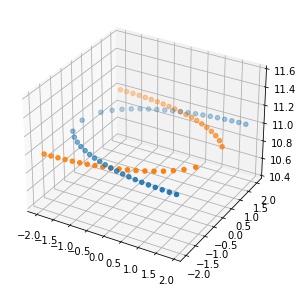

In [36]:
#xValues, yValues =  computeParameterisedPointFromCircle(np.arange(start=-10, stop=10, step=.1), 1)
zValues = np.ones(len(xValues))
zValues = zValues + 10

fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(projection='3d')

p = ax1.scatter(xValues, g4[0:40], zValues, label = "")
p = ax1.scatter(xValues[0:-1], g4[40:], zValues[0:-1], label = "")
#p = ax1.plot(x, y, z, label = "")


#### 1-6 Vector Functions

They have the following form: 

$$ \vec r\left( t \right) = \left\langle {f\left( t \right),g\left( t \right)} \right\rangle \hspace{0.25in}\hspace{0.25in}\hspace{0.25in}\hspace{0.25in}\vec r\left( t \right) = \left\langle {f\left( t \right),g\left( t \right),h\left( t \right)} \right\rangle $$


#### 1-6 Examples

In [37]:
# 1-6.1

# Let t be a variable 
t = sp.symbols('t')

# let g1 be a vector
g1 = np.array([sp.cos(t), sp.log(4 - t), sp.sqrt(t + 1)])

# Let g2, g3, g4 be conditions

g3 = sp.solve_poly_inequality(sp.Poly(t - 4, t, domain='ZZ'), '<')
g4 = sp.solve_poly_inequality(sp.Poly(t + 1, t, domain='ZZ'), '>=')
g4 + g3

[Interval(-1, oo), Interval.open(-oo, 4)]

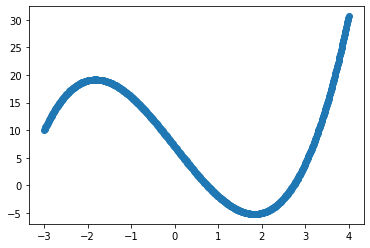

In [38]:
# 1-6.2
# let g1 be a generating function 

t = sp.symbols('t')
g1 = [[t, t**3 - 10 * t + 7 ] for t in np.arange(-3, 4, .01)]
g2 = [g1[i][0] for i in range(len(g1))]
g3 =  [g1[i][1] for i in range(len(g1))]

plt.scatter(g2, g3)

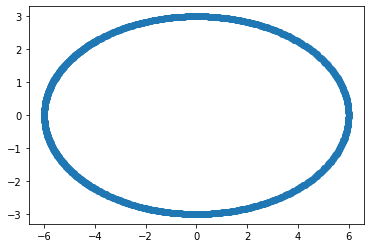

In [49]:
# 1-6.3


t = sp.symbols('t')

g1 = np.arange(-4, 4, .01)
g2 = [[6 * sp.cos(t), 3 * sp.sin(t) ] for t in g1]
g3 = [g2[i][0] for i in range(len(g2))]
g4 =  [g2[i][1] for i in range(len(g2))]
plt.scatter(g3, g4)

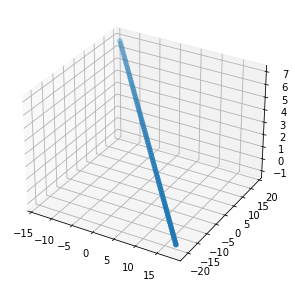

In [57]:
#1-6.4

t = sp.symbols('t')

g1 = np.arange(-4, 4, .1)

g2 = [[2 - 4 * t, -1 + 5 * t, 3 + t] for t in g1]

g3 = [g2[i][0] for i in range(len(g2))]
g4 =  [g2[i][1] for i in range(len(g2))]
g5 =  [g2[i][2] for i in range(len(g2))]


fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(projection='3d')

p = ax1.scatter(g3, g4, g5, label = "")

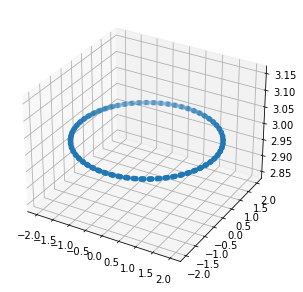

In [60]:
#1-6.4

t = sp.symbols('t')

g1 = np.arange(-10, 10, .1)

g2 = [[2 * sp.cos(t), 2 * sp.sin(t), 3] for t in g1]

g3 = [g2[i][0] for i in range(len(g2))]
g4 =  [g2[i][1] for i in range(len(g2))]
g5 =  [g2[i][2] for i in range(len(g2))]


fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(projection='3d')

p = ax1.scatter(g3, g4, g5, label = "")

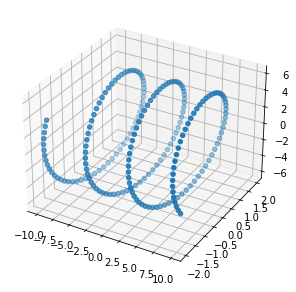

In [61]:
#1-6.5

t = sp.symbols('t')

g1 = np.arange(-10, 10, .1)

g2 = [[t, 2 * sp.cos(t), 6 * sp.sin(t)] for t in g1]

g3 = [g2[i][0] for i in range(len(g2))]
g4 =  [g2[i][1] for i in range(len(g2))]
g5 =  [g2[i][2] for i in range(len(g2))]


fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(projection='3d')

p = ax1.scatter(g3, g4, g5, label = "")

#### 1-6 Problems

In [73]:
# 1-6.2
# Let g1 and g2  be solutions 
t = sp.symbols('t')
g1 = sp.solve(sp.Eq(4 -t**2, 0), t) 
g2 = sp.solve(sp.Eq(sp.sqrt(t + 1), 0), t)




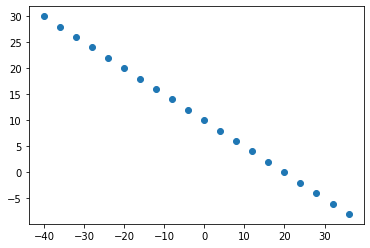

In [85]:
# 1-6.2

t = sp.symbols('t')

# Let g1 be a range of values 

g1 = np.arange(-10, 10, 1)
g2 = [[4 * t, 10 - 2 * t] for t in g1]

g3 = [g2[i][0] for i in range(len(g2))]
g4 =  [g2[i][1] for i in range(len(g2))]

plt.scatter(g3, g4);


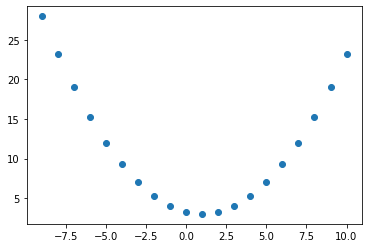

In [86]:
# 1-6.4

t = sp.symbols('t')

# Let g1 be a range of values 

g1 = np.arange(-10, 10, 1)
g2 = [[t + 1, (t**2 / 4) + 3] for t in g1]

g3 = [g2[i][0] for i in range(len(g2))]
g4 =  [g2[i][1] for i in range(len(g2))]

plt.scatter(g3, g4);


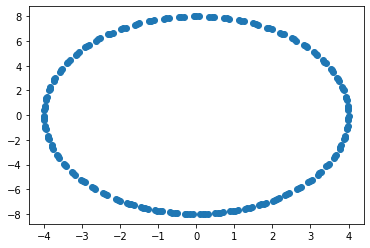

In [89]:
# 1-6.5

t = sp.symbols('t')

# Let g1 be a range of values 

g1 = np.arange(-10, 10, .1)
g2 = [[4 * sp.sin(t), 8 * sp.cos(t)] for t in g1]

g3 = [g2[i][0] for i in range(len(g2))]
g4 =  [g2[i][1] for i in range(len(g2))]

plt.scatter(g3, g4);